<a href="https://colab.research.google.com/github/Nelson-Mantilla/Nelson-Mantilla/blob/main/INFORME%20POR%20MUNICIPIO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CARGAR DATOS GEOGRAFICOS

Mounted at /content/drive
  DPTOMPIO DPTO_CCDGO MPIO_CCDGO  MPIO_CNMBR MPIO_CCNCT  \
0    05001         05        001    MEDELLÍN      05001   
1    05002         05        002   ABEJORRAL      05002   
2    05004         05        004    ABRIAQUÍ      05004   
3    05021         05        021  ALEJANDRÍA      05021   
4    05030         05        030       AMAGÁ      05030   

                                            geometry  
0  POLYGON ((-75.66873 6.37318, -75.66888 6.37329...  
1  POLYGON ((-75.41645 5.90108, -75.4169 5.90064,...  
2  POLYGON ((-76.01161 6.64726, -76.01193 6.64741...  
3  POLYGON ((-74.98189 6.38306, -74.98201 6.38313...  
4  POLYGON ((-75.67424 6.0827, -75.67463 6.08258,...  


<Axes: >

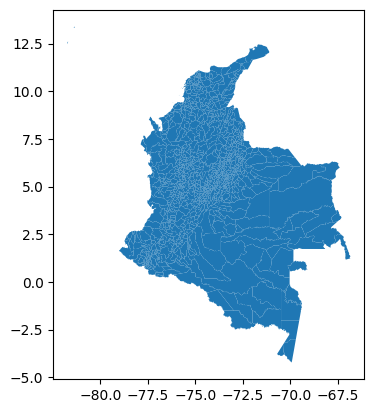

In [ ]:
from google.colab import drive
import geopandas as gpd

# Montar Google Drive
drive.mount('/content/drive')

# Ruta del archivo en tu Google Drive
ruta_geojson = "/content/drive/My Drive/Municipios.json"

# Cargar el archivo GeoJSON
gdf = gpd.read_file(ruta_geojson)
print(gdf.head())

# Visualizar el mapa
gdf.plot()



Número de municipios en el Meta: 29


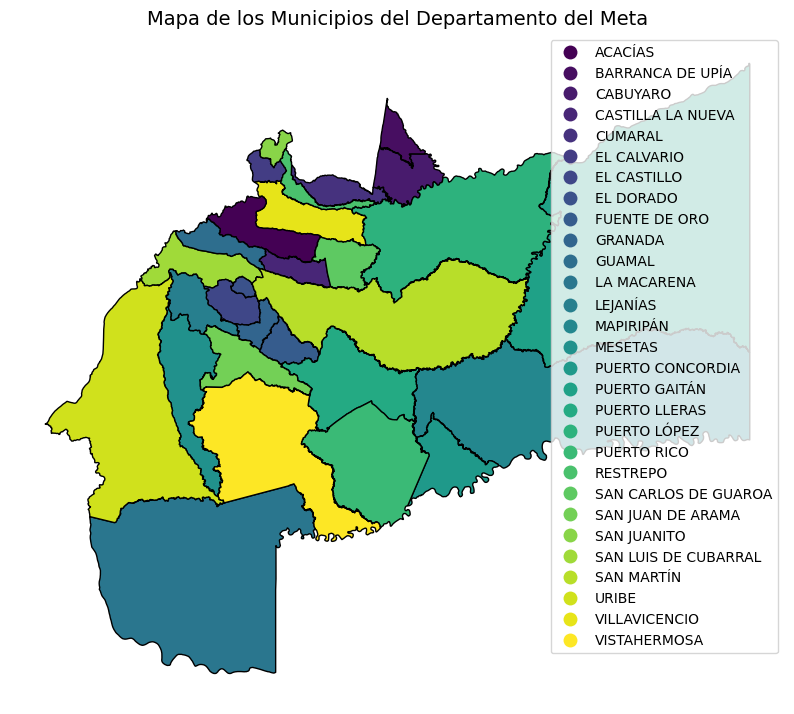

In [ ]:
# Filtrar por el departamento del Meta (código DANE: 50)
gdf_meta = gdf[gdf['DPTO_CCDGO'] == '50']

# Verificar si se filtraron correctamente
print(f"\nNúmero de municipios en el Meta: {len(gdf_meta)}")

# Crear el mapa
fig, ax = plt.subplots(figsize=(10, 10))
gdf_meta.plot(ax=ax, column="MPIO_CNMBR", cmap="viridis", edgecolor="black", legend=True)

# Personalizar el mapa
plt.title("Mapa de los Municipios del Departamento del Meta", fontsize=14)
plt.axis('off')  # Ocultar los ejes
plt.show()


Número de municipios en el Meta: 29


<ipython-input-45-bc4c4a2e1c99>:23: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(gdf_meta.geometry.centroid.x, gdf_meta.geometry.centroid.y, gdf_meta["MPIO_CNMBR"]):


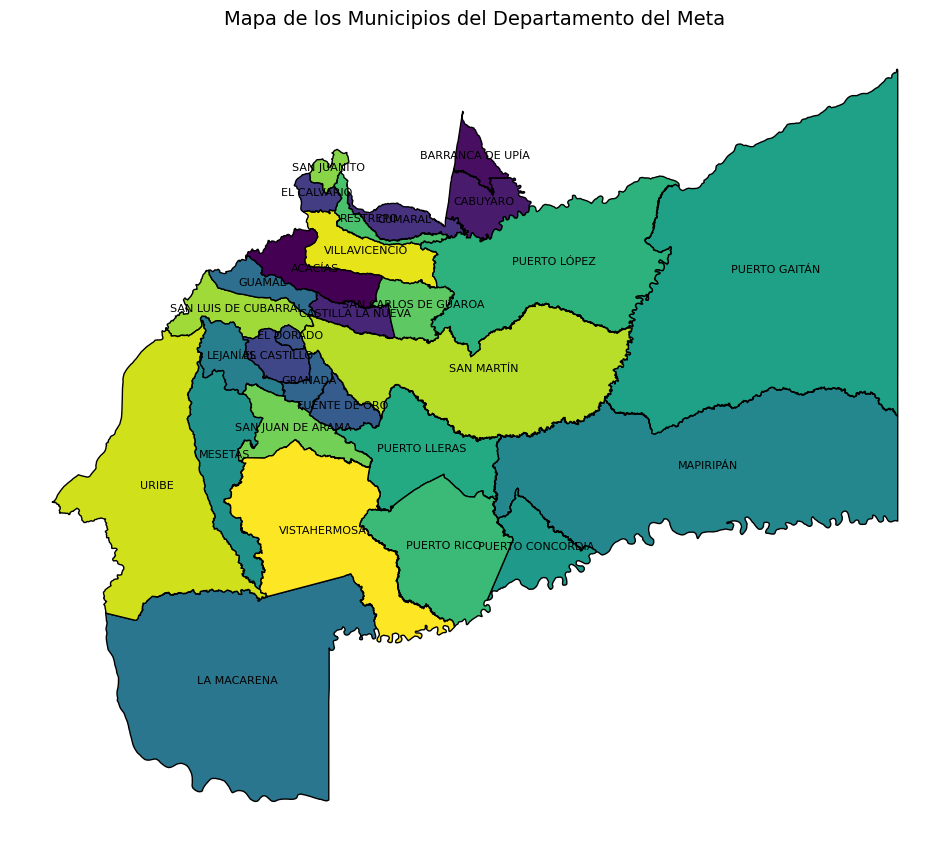

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Filtrar por el departamento del Meta (código DANE: 50)
gdf_meta = gdf[gdf['DPTO_CCDGO'] == '50']

# Verificar si se filtraron correctamente
print(f"\nNúmero de municipios en el Meta: {len(gdf_meta)}")

# Crear el mapa
fig, ax = plt.subplots(figsize=(12, 12))  # Puedes ajustar el tamaño si es necesario

# Graficar los municipios
gdf_meta.plot(
    ax=ax,
    column="MPIO_CNMBR",  # Columna que contiene los nombres de los municipios
    cmap="viridis",
    edgecolor="black",
    legend=False  # Desactivar la leyenda
)

# Añadir los nombres de los municipios sobre el mapa
for x, y, label in zip(gdf_meta.geometry.centroid.x, gdf_meta.geometry.centroid.y, gdf_meta["MPIO_CNMBR"]):
    ax.text(x, y, label, fontsize=8, ha='center', color='black')

# Personalizar el mapa
plt.title("Mapa de los Municipios del Departamento del Meta", fontsize=14)
plt.axis('off')  # Ocultar los ejes
plt.show()


# GENERAR Y GUARDAR EN IMAGEN UN MAPA POR MUNICIPIO

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import os

# Filtrar por el departamento del Meta (código DANE: 50)
gdf_meta = gdf[gdf['DPTO_CCDGO'] == '50']

# Crear carpeta para guardar los mapas (si no existe)
output_folder = "mapas_municipios"
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Generar un mapa para cada municipio
for i, municipio in enumerate(gdf_meta.itertuples(), 1):
    # Crear una figura
    fig, ax = plt.subplots(figsize=(10, 10))

    # Graficar el municipio actual
    gdf_meta[gdf_meta['MPIO_CNMBR'] == municipio.MPIO_CNMBR].plot(
        ax=ax,
        color='lightblue',
        edgecolor='black'
    )

    # Eliminar nombres y leyenda
    plt.axis('off')  # Ocultar los ejes

    # Guardar el mapa en la carpeta de salida
    mapa_filename = os.path.join(output_folder, f"municipio_{municipio.MPIO_CNMBR}.png")
    plt.savefig(mapa_filename, bbox_inches='tight', pad_inches=0.1)
    plt.close(fig)  # Cerrar la figura para liberar memoria

    # Confirmar que el mapa se guardó
    print(f"Mapa para {municipio.MPIO_CNMBR} guardado como {mapa_filename}")

print("\nTodos los mapas han sido generados y guardados.")


Mapa para VILLAVICENCIO guardado como mapas_municipios/municipio_VILLAVICENCIO.png
Mapa para ACACÍAS guardado como mapas_municipios/municipio_ACACÍAS.png
Mapa para BARRANCA DE UPÍA guardado como mapas_municipios/municipio_BARRANCA DE UPÍA.png
Mapa para CABUYARO guardado como mapas_municipios/municipio_CABUYARO.png
Mapa para CASTILLA LA NUEVA guardado como mapas_municipios/municipio_CASTILLA LA NUEVA.png
Mapa para SAN LUIS DE CUBARRAL guardado como mapas_municipios/municipio_SAN LUIS DE CUBARRAL.png
Mapa para CUMARAL guardado como mapas_municipios/municipio_CUMARAL.png
Mapa para EL CALVARIO guardado como mapas_municipios/municipio_EL CALVARIO.png
Mapa para EL CASTILLO guardado como mapas_municipios/municipio_EL CASTILLO.png
Mapa para EL DORADO guardado como mapas_municipios/municipio_EL DORADO.png
Mapa para FUENTE DE ORO guardado como mapas_municipios/municipio_FUENTE DE ORO.png
Mapa para GRANADA guardado como mapas_municipios/municipio_GRANADA.png
Mapa para GUAMAL guardado como mapas_m

In [ ]:
import os
print(os.getcwd())  # Imprime el directorio actual


/content


In [ ]:
!pip install python-docx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 4.5 MB/s eta 0:00:00


In [ ]:
from docx import Document
from docx.shared import Inches
import os

# Ruta de la carpeta donde se guardaron los mapas
output_folder = "mapas_municipios"

# Crear un nuevo documento de Word
doc = Document()

# Listar todos los archivos PNG en la carpeta
mapa_files = [f for f in os.listdir(output_folder) if f.endswith('.png')]

# Ordenar los archivos alfabéticamente por el nombre del municipio
mapa_files.sort(key=lambda x: x.split('.')[0].replace('municipio_', '').lower())

# Iterar sobre cada archivo de mapa
for mapa_file in mapa_files:
    # Crear una nueva página para cada municipio
    doc.add_page_break()  # Esto asegura que cada mapa esté en una página separada

    # Extraer el nombre del municipio del nombre del archivo (ej. "municipio_001.png")
    municipio_nombre = mapa_file.split('.')[0].replace('municipio_', '')

    # Título con el nombre del municipio
    doc.add_heading(f"Municipio: {municipio_nombre}", level=1)

    # Ruta completa del mapa
    mapa_path = os.path.join(output_folder, mapa_file)

    # Insertar la imagen en el documento con tamaño mediano (4 pulgadas de ancho)
    doc.add_picture(mapa_path, width=Inches(4))  # Tamaño mediano

# Guardar el archivo Word
output_docx = "mapas_municipios_ordenado.docx"
doc.save(output_docx)

print(f"Archivo Word generado con éxito: {output_docx}")


Archivo Word generado con éxito: mapas_municipios_ordenado.docx


In [ ]:
!pip install gdown


In [ ]:
import gdown

# Reemplaza 'FILE_ID' con el ID del archivo
file_id = '1ph9sq-XZBCq191ehJxL5o-9_W6CclU_H'
url = f'https://drive.google.com/uc?id={file_id}'

# Descargar el archivo CSV
gdown.download(url, 'archivo.csv', quiet=False)


Downloading...
From: https://drive.google.com/uc?id=1ph9sq-XZBCq191ehJxL5o-9_W6CclU_H
To: /content/archivo.csv
100%|██████████| 1.21M/1.21M [00:00<00:00, 48.1MB/s]


'archivo.csv'

In [ ]:
import pandas as pd

# Leer el archivo CSV descargado
df = pd.read_csv('archivo.csv')

# Mostrar las primeras filas
print(df.head())


  CRIMINALIDAD ES_ARCHIVO ES_PRECLUSIÓN    ESTADO  ETAPA_CASO      LEY  \
0           SI         NO            NO  INACTIVO  INDAGACIÓN  Ley 906   
1           NO         SI            NO  INACTIVO  INDAGACIÓN  Ley 906   
2           SI         NO            SI  INACTIVO  INDAGACIÓN  Ley 906   
3           SI         SI            NO  INACTIVO  INDAGACIÓN  Ley 906   
4           SI         NO            NO    ACTIVO  INDAGACIÓN  Ley 906   

  PAÍS_HECHO DEPARTAMENTO_HECHO MUNICIPIO_HECHO                    SECCIONAL  \
0   Colombia               Meta   VILLAVICENCIO  DIRECCIÓN SECCIONAL DE META   
1   Colombia               Meta   VILLAVICENCIO  DIRECCIÓN SECCIONAL DE META   
2   Colombia               Meta   PUERTO GAITÁN  DIRECCIÓN SECCIONAL DE META   
3   Colombia               Meta   VILLAVICENCIO  DIRECCIÓN SECCIONAL DE META   
4   Colombia               Meta   VILLAVICENCIO  DIRECCIÓN SECCIONAL DE META   

   ...         GRUPO_DELITO VÍCTIMA_CONSUMADO       SEXO  \
0  ...  LESION

In [ ]:
# Mostrar los nombres de las columnas
print("Nombres de las columnas:")
print(df.columns)

Nombres de las columnas:
Index(['CRIMINALIDAD', 'ES_ARCHIVO', 'ES_PRECLUSIÓN', 'ESTADO', 'ETAPA_CASO',
       'LEY', 'PAÍS_HECHO', 'DEPARTAMENTO_HECHO', 'MUNICIPIO_HECHO',
       'SECCIONAL', 'AÑO_HECHOS', 'AÑO_ENTRADA', 'AÑO_DENUNCIA', 'DELITO',
       'GRUPO_DELITO', 'VÍCTIMA_CONSUMADO', 'SEXO', 'GRUPO_ETARIO',
       'PAÍS_NACIMIENTO', 'APLICA_LGBTI', 'APLICA_NNA', 'INDÍGENA',
       'AFRODESCENDIENTE', 'TOTAL_VÍCTIMAS'],
      dtype='object')


In [ ]:
from docx import Document
from docx.shared import Inches
import pandas as pd
import os

# Ruta de la carpeta donde se guardaron los mapas
output_folder = "mapas_municipios"

# Leer el archivo CSV con la información de víctimas
df = pd.read_csv('archivo.csv')

# Filtrar solo los datos del año 2024
df_2024 = df[df['AÑO_HECHOS'] == 2024]

# Crear un nuevo documento de Word
doc = Document()

# Listar todos los archivos PNG en la carpeta (mapas de municipios)
mapa_files = [f for f in os.listdir(output_folder) if f.endswith('.png')]

# Ordenar los archivos alfabéticamente por el nombre del municipio
mapa_files.sort(key=lambda x: x.split('.')[0].replace('municipio_', '').lower())

# Iterar sobre cada archivo de mapa
for mapa_file in mapa_files:
    # Crear una nueva página para cada municipio
    doc.add_page_break()  # Esto asegura que cada mapa esté en una página separada

    # Extraer el nombre del municipio del nombre del archivo (ej. "municipio_001.png")
    municipio_nombre = mapa_file.split('.')[0].replace('municipio_', '')

    # Título con el nombre del municipio
    doc.add_heading(f"Municipio: {municipio_nombre}", level=1)

    # Ruta completa del mapa
    mapa_path = os.path.join(output_folder, mapa_file)

    # Insertar la imagen en el documento con tamaño mediano (4 pulgadas de ancho)
    doc.add_picture(mapa_path, width=Inches(4))  # Tamaño mediano

    # Filtrar los datos para el municipio actual
    df_municipio = df_2024[df_2024['MUNICIPIO_HECHO'] == municipio_nombre]

    # Agrupar los datos por sexo y grupo de delito
    tabla = df_municipio.groupby(['SEXO', 'GRUPO_DELITO'])['TOTAL_VÍCTIMAS'].sum().unstack(fill_value=0)

    # Agregar una tabla al documento de Word
    doc.add_heading("Total de víctimas por sexo y grupo de delito (2024)", level=2)

    # Crear la tabla
    table = doc.add_table(rows=1, cols=len(tabla.columns) + 1)  # una columna extra para "Sexo/Delito"

    # Escribir los encabezados de la tabla
    hdr_cells = table.rows[0].cells
    hdr_cells[0].text = "Sexo / Delito"
    for idx, col in enumerate(tabla.columns):
        hdr_cells[idx + 1].text = str(col)

    # Llenar la tabla con los datos
    for sexo, row in tabla.iterrows():
        row_cells = table.add_row().cells
        row_cells[0].text = str(sexo)  # Escribir el sexo
        for idx, value in enumerate(row):
            row_cells[idx + 1].text = str(value)  # Escribir el total de víctimas

# Guardar el archivo Word
output_docx = "mapas_municipios_con_tablas_2024.docx"
doc.save(output_docx)

print(f"Archivo Word generado con éxito: {output_docx}")


Archivo Word generado con éxito: mapas_municipios_con_tablas_2024.docx


In [ ]:
!pip install openpyxl



In [ ]:
import gdown
import pandas as pd

# ID del archivo de Google Drive (reemplaza con el ID correcto)
file_id = '1xucytpMfToLuyqyRPReh2KfJp5QPEbSp'

# Crear la URL de descarga
url = f'https://drive.google.com/uc?export=download&id={file_id}'

# Ruta donde se guardará el archivo descargado
output_path = 'datos_poblacion.xlsx'

# Descargar el archivo desde Google Drive
gdown.download(url, output_path, quiet=False)

# Leer el archivo Excel con pandas
df_poblacion = pd.read_excel(output_path)

# Verificar las primeras filas del archivo y las columnas
print(df_poblacion.columns)
print(df_poblacion.head())


Downloading...
From (original): https://drive.google.com/uc?export=download&id=1xucytpMfToLuyqyRPReh2KfJp5QPEbSp
From (redirected): https://drive.google.com/uc?export=download&id=1xucytpMfToLuyqyRPReh2KfJp5QPEbSp&confirm=t&uuid=882a4062-e261-4ca6-913c-68b2f1884490
To: /content/datos_poblacion.xlsx
100%|██████████| 69.0M/69.0M [00:00<00:00, 101MB/s] 


Index(['DP', 'DPNOM', 'MPIO', 'DPMP', 'AÑO', 'ÁREA GEOGRÁFICA', 'Hombres_0',
       'Hombres_1', 'Hombres_2', 'Hombres_3',
       ...
       'Total_79', 'Total_80', 'Total_81', 'Total_82', 'Total_83', 'Total_84',
       'Total_85 y más', 'Total Hombres', 'Total Mujeres', 'Total'],
      dtype='object', length=267)
   DP      DPNOM  MPIO      DPMP   AÑO                    ÁREA GEOGRÁFICA  \
0   5  Antioquia  5001  Medellín  2020                 Cabecera Municipal   
1   5  Antioquia  5001  Medellín  2020  Centros Poblados y Rural Disperso   
2   5  Antioquia  5001  Medellín  2020                              Total   
3   5  Antioquia  5001  Medellín  2021                 Cabecera Municipal   
4   5  Antioquia  5001  Medellín  2021  Centros Poblados y Rural Disperso   

   Hombres_0  Hombres_1  Hombres_2  Hombres_3  ...  Total_79  Total_80  \
0      14037      14299      14543      14689  ...      7317      6549   
1        317        317        316        312  ...       104        93   

In [ ]:
import pandas as pd

# Leer el archivo Excel (si no lo has hecho ya)
# df_poblacion = pd.read_excel('ruta/del/archivo.xlsx')

# Filtrar por Meta (DPNOM) y Año 2024
df_meta = df_poblacion[(df_poblacion['DPNOM'] == 'Meta') &
                       (df_poblacion['AÑO'] == 2024) &
                       (df_poblacion['ÁREA GEOGRÁFICA'] == 'Total')]

# Verificar las primeras filas después del filtro
print(df_meta.head())


       DP DPNOM   MPIO               DPMP   AÑO ÁREA GEOGRÁFICA  Hombres_0  \
32942  50  Meta  50001      Villavicencio  2024           Total       3791   
32990  50  Meta  50006            Acacías  2024           Total        659   
33038  50  Meta  50110   Barranca de Upía  2024           Total         59   
33086  50  Meta  50124           Cabuyaro  2024           Total         56   
33134  50  Meta  50150  Castilla la Nueva  2024           Total        127   

       Hombres_1  Hombres_2  Hombres_3  ...  Total_79  Total_80  Total_81  \
32942       3801       3800       3937  ...      1468      1315      1176   
32990        662        660        681  ...       244       223       197   
33038         59         59         62  ...        16        11        13   
33086         55         55         59  ...        16        14         8   
33134        128        126        130  ...        28        25        24   

       Total_82  Total_83  Total_84  Total_85 y más  Total Hombres  

In [ ]:
from docx import Document
import pandas as pd

# Crear un nuevo documento de Word
doc = Document()

# Agrupar los datos por municipio (DPMP) y sumar los valores de hombres, mujeres y total
df_agrupado = df_meta.groupby('DPMP').agg({
    'Total Hombres': 'sum',
    'Total Mujeres': 'sum',
    'Total': 'sum'
}).reset_index()

# Agregar la información a un documento de Word para cada municipio
for index, row in df_agrupado.iterrows():
    # Título del municipio
    doc.add_heading(f'Municipio: {row["DPMP"]}', level=1)

    # Crear la tabla de totales por municipio
    table = doc.add_table(rows=1, cols=3)

    # Configurar las cabeceras de la tabla
    table.cell(0, 0).text = 'Total Hombres'
    table.cell(0, 1).text = 'Total Mujeres'
    table.cell(0, 2).text = 'Total Población'

    # Agregar los datos del municipio
    row_cells = table.add_row().cells
    row_cells[0].text = str(row['Total Hombres'])
    row_cells[1].text = str(row['Total Mujeres'])
    row_cells[2].text = str(row['Total'])

    # Agregar un salto de línea entre tablas
    doc.add_paragraph("\n")

# Guardar el documento
doc.save("Informe_Poblacion_Meta_2024.docx")

print("Documento generado con éxito.")


Documento generado con éxito.


In [ ]:
# Asegurarse de que la columna DPMP (municipios) esté en mayúsculas
df_meta['DPMP'] = df_meta['DPMP'].str.upper()

# Cambiar 'CUBARRAL' por 'SAN LUIS DE CUBARRAL'
df_meta['DPMP'] = df_meta['DPMP'].replace('CUBARRAL', 'SAN LUIS DE CUBARRAL')

# Verificar los cambios
print(df_meta['DPMP'].unique())


['VILLAVICENCIO' 'ACACÍAS' 'BARRANCA DE UPÍA' 'CABUYARO'
 'CASTILLA LA NUEVA' 'SAN LUIS DE CUBARRAL' 'CUMARAL' 'EL CALVARIO'
 'EL CASTILLO' 'EL DORADO' 'FUENTE DE ORO' 'GRANADA' 'GUAMAL' 'MAPIRIPÁN'
 'MESETAS' 'LA MACARENA' 'URIBE' 'LEJANÍAS' 'PUERTO CONCORDIA'
 'PUERTO GAITÁN' 'PUERTO LÓPEZ' 'PUERTO LLERAS' 'PUERTO RICO' 'RESTREPO'
 'SAN CARLOS DE GUAROA' 'SAN JUAN DE ARAMA' 'SAN JUANITO' 'SAN MARTÍN'
 'VISTAHERMOSA']


<ipython-input-8-2018635cb621>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_meta['DPMP'] = df_meta['DPMP'].str.upper()
<ipython-input-8-2018635cb621>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_meta['DPMP'] = df_meta['DPMP'].replace('CUBARRAL', 'SAN LUIS DE CUBARRAL')


In [ ]:
from docx import Document
from docx.shared import Inches
import pandas as pd
import os

# Ruta de la carpeta donde se guardaron los mapas
output_folder = "mapas_municipios"

# Leer el archivo CSV con la información de víctimas
df_victimas = pd.read_csv('archivo.csv')

# Filtrar solo los datos del año 2024 para víctimas
df_victimas_2024 = df_victimas[df_victimas['AÑO_HECHOS'] == 2024]

# Leer el archivo de población (df_meta ya contiene datos de Meta filtrados previamente)
df_poblacion = df_meta

# Crear un nuevo documento de Word
doc = Document()

# Listar todos los archivos PNG en la carpeta (mapas de municipios)
mapa_files = [f for f in os.listdir(output_folder) if f.endswith('.png')]

# Ordenar los archivos alfabéticamente por el nombre del municipio
mapa_files.sort(key=lambda x: x.split('.')[0].replace('municipio_', '').lower())

# Iterar sobre cada archivo de mapa
for mapa_file in mapa_files:
    # Crear una nueva página para cada municipio
    doc.add_page_break()  # Asegura que cada municipio empiece en una página nueva

    # Extraer el nombre del municipio del archivo (ej. "municipio_001.png")
    municipio_nombre = mapa_file.split('.')[0].replace('municipio_', '')

    # Título con el nombre del municipio
    doc.add_heading(f"Municipio: {municipio_nombre}", level=1)

    # Ruta completa del mapa
    mapa_path = os.path.join(output_folder, mapa_file)

    # Insertar la imagen del mapa con tamaño mediano
    doc.add_picture(mapa_path, width=Inches(4))  # Tamaño mediano

    # Agregar información de víctimas
    doc.add_heading("Total de víctimas por sexo y grupo de delito (2024)", level=2)

    # Filtrar los datos de víctimas para el municipio actual
    df_municipio_victimas = df_victimas_2024[df_victimas_2024['MUNICIPIO_HECHO'] == municipio_nombre]

    if not df_municipio_victimas.empty:
        # Agrupar los datos por sexo y grupo de delito
        tabla_victimas = df_municipio_victimas.groupby(['SEXO', 'GRUPO_DELITO'])['TOTAL_VÍCTIMAS'].sum().unstack(fill_value=0)

        # Crear la tabla de víctimas
        table_victimas = doc.add_table(rows=1, cols=len(tabla_victimas.columns) + 1)
        hdr_cells = table_victimas.rows[0].cells
        hdr_cells[0].text = "Sexo / Delito"
        for idx, col in enumerate(tabla_victimas.columns):
            hdr_cells[idx + 1].text = str(col)

        for sexo, row in tabla_victimas.iterrows():
            row_cells = table_victimas.add_row().cells
            row_cells[0].text = str(sexo)
            for idx, value in enumerate(row):
                row_cells[idx + 1].text = str(value)
    else:
        doc.add_paragraph("No se encontraron datos de víctimas para este municipio.")

    # Agregar información de población
    doc.add_heading("Población por sexo (2024)", level=2)

    # Filtrar los datos de población para el municipio actual
    df_municipio_poblacion = df_poblacion[df_poblacion['DPMP'] == municipio_nombre]

    if not df_municipio_poblacion.empty:
        # Crear la tabla de población
        table_poblacion = doc.add_table(rows=2, cols=3)  # Encabezados y una fila de datos
        table_poblacion.cell(0, 0).text = "Total Hombres"
        table_poblacion.cell(0, 1).text = "Total Mujeres"
        table_poblacion.cell(0, 2).text = "Total Población"

        row_cells = table_poblacion.rows[1].cells
        row_cells[0].text = str(df_municipio_poblacion['Total Hombres'].sum())
        row_cells[1].text = str(df_municipio_poblacion['Total Mujeres'].sum())
        row_cells[2].text = str(df_municipio_poblacion['Total'].sum())
    else:
        doc.add_paragraph("No se encontraron datos de población para este municipio.")

# Guardar el archivo Word
output_docx = "Informe_Completo_Meta_2024.docx"
doc.save(output_docx)

print(f"Archivo Word generado con éxito: {output_docx}")


Archivo Word generado con éxito: Informe_Completo_Meta_2024.docx


In [ ]:
from docx import Document
from docx.shared import Inches
import pandas as pd
import os
import matplotlib.pyplot as plt

# Ruta de la carpeta donde se guardaron los mapas
output_folder = "mapas_municipios"

# Leer el archivo CSV con la información de víctimas
df_victimas = pd.read_csv('archivo.csv')

# Filtrar solo los datos del año 2024 para víctimas
df_victimas_2024 = df_victimas[df_victimas['AÑO_HECHOS'] == 2024]

# Leer el archivo de población (df_meta ya contiene datos de Meta filtrados previamente)
df_poblacion = df_meta

# Crear un nuevo documento de Word
doc = Document()

# Listar todos los archivos PNG en la carpeta (mapas de municipios)
mapa_files = [f for f in os.listdir(output_folder) if f.endswith('.png')]

# Ordenar los archivos alfabéticamente por el nombre del municipio
mapa_files.sort(key=lambda x: x.split('.')[0].replace('municipio_', '').lower())

# Definir una paleta de colores con cinco colores distintos
colors = ['#4c78a8', '#f58518', '#e45756', '#72b7b2', '#54a24b']

# Iterar sobre cada archivo de mapa
for mapa_file in mapa_files:
    # Crear una nueva página para cada municipio
    doc.add_page_break()  # Asegura que cada municipio empiece en una página nueva

    # Extraer el nombre del municipio del archivo (ej. "municipio_001.png")
    municipio_nombre = mapa_file.split('.')[0].replace('municipio_', '')

    # Título con el nombre del municipio
    doc.add_heading(f"Municipio: {municipio_nombre}", level=1)

    # Ruta completa del mapa
    mapa_path = os.path.join(output_folder, mapa_file)

    # Insertar la imagen del mapa con tamaño mediano
    doc.add_picture(mapa_path, width=Inches(4))  # Tamaño mediano

    # Agregar información de víctimas
    doc.add_heading("Total de víctimas por sexo y grupo de delito (2024)", level=2)

    # Filtrar los datos de víctimas para el municipio actual
    df_municipio_victimas = df_victimas_2024[df_victimas_2024['MUNICIPIO_HECHO'] == municipio_nombre]

    if not df_municipio_victimas.empty:
        # Agrupar los datos por sexo y grupo de delito
        tabla_victimas = df_municipio_victimas.groupby(['SEXO', 'GRUPO_DELITO'])['TOTAL_VÍCTIMAS'].sum().unstack(fill_value=0)

        # Crear la tabla de víctimas
        table_victimas = doc.add_table(rows=1, cols=len(tabla_victimas.columns) + 1)
        hdr_cells = table_victimas.rows[0].cells
        hdr_cells[0].text = "Sexo / Delito"
        for idx, col in enumerate(tabla_victimas.columns):
            hdr_cells[idx + 1].text = str(col)

        for sexo, row in tabla_victimas.iterrows():
            row_cells = table_victimas.add_row().cells
            row_cells[0].text = str(sexo)
            for idx, value in enumerate(row):
                row_cells[idx + 1].text = str(value)

        # Crear un gráfico de barras agrupadas para la tabla de víctimas
        fig, ax = plt.subplots(figsize=(6, 4))
        tabla_victimas.plot(kind='bar', ax=ax, color=colors[:len(tabla_victimas.columns)])
        ax.set_xlabel("Sexo")
        ax.set_ylabel("Número de víctimas")
        ax.legend(title="Grupo de delito", loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=3)
        plt.tight_layout()

        # Guardar el gráfico temporalmente
        grafico_victimas_path = f"grafico_victimas_{municipio_nombre}.png"
        plt.savefig(grafico_victimas_path, bbox_inches='tight')
        plt.close()

        # Insertar el título del gráfico en Word
        doc.add_paragraph("Gráfico: Total de víctimas por sexo y grupo de delito", style='Heading 3')

        # Insertar el gráfico en el documento
        doc.add_picture(grafico_victimas_path, width=Inches(5))

        # Eliminar el archivo temporal después de usarlo
        os.remove(grafico_victimas_path)

    else:
        doc.add_paragraph("No se encontraron datos de víctimas para este municipio.")

    # Agregar información de población
    doc.add_heading("Población por sexo (2024)", level=2)

    # Filtrar los datos de población para el municipio actual
    df_municipio_poblacion = df_poblacion[df_poblacion['DPMP'] == municipio_nombre]

    if not df_municipio_poblacion.empty:
        # Crear la tabla de población
        table_poblacion = doc.add_table(rows=2, cols=3)  # Encabezados y una fila de datos
        table_poblacion.cell(0, 0).text = "Total Hombres"
        table_poblacion.cell(0, 1).text = "Total Mujeres"
        table_poblacion.cell(0, 2).text = "Total Población"

        row_cells = table_poblacion.rows[1].cells
        total_hombres = df_municipio_poblacion['Total Hombres'].sum()
        total_mujeres = df_municipio_poblacion['Total Mujeres'].sum()
        total_poblacion = df_municipio_poblacion['Total'].sum()

        row_cells[0].text = str(total_hombres)
        row_cells[1].text = str(total_mujeres)
        row_cells[2].text = str(total_poblacion)

        # Crear un gráfico de torta para la población
        fig, ax = plt.subplots(figsize=(4, 4))
        ax.pie([total_hombres, total_mujeres],
               labels=['Hombres', 'Mujeres'],
               autopct='%1.1f%%',
               colors=colors[:2])
        plt.tight_layout()

        # Guardar el gráfico temporalmente
        grafico_poblacion_path = f"grafico_poblacion_{municipio_nombre}.png"
        plt.savefig(grafico_poblacion_path, bbox_inches='tight')
        plt.close()

        # Insertar el título del gráfico en Word
        doc.add_paragraph("Gráfico: Distribución poblacional por sexo", style='Heading 3')

        # Insertar el gráfico en el documento
        doc.add_picture(grafico_poblacion_path, width=Inches(4))

        # Eliminar el archivo temporal después de usarlo
        os.remove(grafico_poblacion_path)

    else:
        doc.add_paragraph("No se encontraron datos de población para este municipio.")

# Guardar el archivo Word
output_docx = "Informe_Completo_Meta_2024_Con_Graficos.docx"
doc.save(output_docx)

print(f"Archivo Word generado con éxito: {output_docx}")


Archivo Word generado con éxito: Informe_Completo_Meta_2024_Con_Graficos.docx


In [ ]:
from docx import Document
from docx.shared import Inches
import pandas as pd
import os
import matplotlib.pyplot as plt

# Ruta de la carpeta donde se guardaron los mapas
output_folder = "mapas_municipios"

# Leer el archivo CSV con la información de víctimas
df_victimas = pd.read_csv('archivo.csv')

# Filtrar solo los datos del año 2024 para víctimas
df_victimas_2024 = df_victimas[df_victimas['AÑO_HECHOS'] == 2024]

# Leer el archivo de población (df_meta ya contiene datos de Meta filtrados previamente)
df_poblacion = df_meta

# Crear un nuevo documento de Word
doc = Document()

# Listar todos los archivos PNG en la carpeta (mapas de municipios)
mapa_files = [f for f in os.listdir(output_folder) if f.endswith('.png')]

# Ordenar los archivos alfabéticamente por el nombre del municipio
mapa_files.sort(key=lambda x: x.split('.')[0].replace('municipio_', '').lower())

# Definir una paleta de colores con tres colores para gráficos de víctimas y cinco para acumulados
colors_victimas = ['#4c78a8', '#f58518', '#e45756']  # Masculino, Femenino, Otros
colors_acumulados = ['#4c78a8', '#f58518', '#e45756', '#72b7b2', '#54a24b']

# Iterar sobre cada archivo de mapa
for mapa_file in mapa_files:
    # Crear una nueva página para cada municipio
    doc.add_page_break()

    # Extraer el nombre del municipio del archivo (ej. "municipio_001.png")
    municipio_nombre = mapa_file.split('.')[0].replace('municipio_', '')

    # Título con el nombre del municipio
    doc.add_heading(f"Municipio: {municipio_nombre}", level=1)

    # Ruta completa del mapa
    mapa_path = os.path.join(output_folder, mapa_file)

    # Insertar la imagen del mapa con tamaño mediano
    doc.add_picture(mapa_path, width=Inches(4))

    # Tabla y gráfico de víctimas por grupo de delito
    doc.add_heading("Total de víctimas por sexo y grupo de delito (2024)", level=2)

    # Filtrar datos de víctimas para el municipio
    df_municipio_victimas = df_victimas_2024[df_victimas_2024['MUNICIPIO_HECHO'] == municipio_nombre]

    if not df_municipio_victimas.empty:
        tabla_victimas = df_municipio_victimas.groupby(['SEXO', 'GRUPO_DELITO'])['TOTAL_VÍCTIMAS'].sum().unstack(fill_value=0)

        # Crear la tabla
        table_victimas = doc.add_table(rows=1, cols=len(tabla_victimas.columns) + 1)
        hdr_cells = table_victimas.rows[0].cells
        hdr_cells[0].text = "Sexo / Delito"
        for idx, col in enumerate(tabla_victimas.columns):
            hdr_cells[idx + 1].text = str(col)

        for sexo, row in tabla_victimas.iterrows():
            row_cells = table_victimas.add_row().cells
            row_cells[0].text = str(sexo)
            for idx, value in enumerate(row):
                row_cells[idx + 1].text = str(value)

        # Gráfico de barras agrupadas
        fig, ax = plt.subplots(figsize=(6, 4))
        tabla_victimas.T.plot(kind='bar', ax=ax, color=colors_victimas[:len(tabla_victimas.index)])
        ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
        ax.set_ylabel("Total de Víctimas")
        plt.tight_layout()

        # Guardar e insertar el gráfico
        grafico_victimas_path = f"grafico_victimas_{municipio_nombre}.png"
        plt.savefig(grafico_victimas_path, bbox_inches='tight')
        plt.close()
        doc.add_picture(grafico_victimas_path, width=Inches(5))
        os.remove(grafico_victimas_path)

    # Tabla y gráfico de población por sexo
    doc.add_heading("Población por sexo (2024)", level=2)
    df_municipio_poblacion = df_poblacion[df_poblacion['DPMP'] == municipio_nombre]

    if not df_municipio_poblacion.empty:
        table_poblacion = doc.add_table(rows=2, cols=3)
        table_poblacion.cell(0, 0).text = "Total Hombres"
        table_poblacion.cell(0, 1).text = "Total Mujeres"
        table_poblacion.cell(0, 2).text = "Total Población"

        row_cells = table_poblacion.rows[1].cells
        total_hombres = df_municipio_poblacion['Total Hombres'].sum()
        total_mujeres = df_municipio_poblacion['Total Mujeres'].sum()
        total_poblacion = df_municipio_poblacion['Total'].sum()

        row_cells[0].text = str(total_hombres)
        row_cells[1].text = str(total_mujeres)
        row_cells[2].text = str(total_poblacion)

        # Gráfico de torta
        fig, ax = plt.subplots(figsize=(3, 3))  # Tamaño reducido
        ax.pie([total_hombres, total_mujeres], labels=["Hombres", "Mujeres"], autopct='%1.1f%%', colors=colors_victimas[:2])
        plt.tight_layout()

        grafico_poblacion_path = f"grafico_poblacion_{municipio_nombre}.png"
        plt.savefig(grafico_poblacion_path)
        plt.close()
        doc.add_picture(grafico_poblacion_path, width=Inches(4))  # Gráfico más pequeño
        os.remove(grafico_poblacion_path)

    # Tabla y gráfico de tasas de delitos
    doc.add_heading("Tasa de delitos por cada 1,000 mujeres (2024)", level=2)

    if not df_municipio_victimas.empty and total_mujeres > 0:
        tasas = (df_municipio_victimas[df_municipio_victimas['SEXO'] == 'FEMENINO']
                 .groupby('GRUPO_DELITO')['TOTAL_VÍCTIMAS']
                 .sum() / total_mujeres) * 1000

        # Crear la tabla
        table_tasas = doc.add_table(rows=1, cols=2)
        hdr_cells = table_tasas.rows[0].cells
        hdr_cells[0].text = "Grupo de Delito"
        hdr_cells[1].text = "Tasa por 1,000 Mujeres"

        for delito, tasa in tasas.items():
            row_cells = table_tasas.add_row().cells
            row_cells[0].text = str(delito)
            row_cells[1].text = f"{tasa:.2f}"

        # Gráfico de barras acumulado
        fig, ax = plt.subplots(figsize=(6, 4))
        tasas.plot(kind='bar', stacked=True, ax=ax, color=colors_acumulados[:len(tasas)])
        ax.set_ylabel("Tasa por 1,000 Mujeres")
        ax.legend(["Tasa x 1,000 Mujeres"], loc='center left', bbox_to_anchor=(1.0, 0.5))
        plt.tight_layout()

        grafico_tasas_path = f"grafico_tasas_{municipio_nombre}.png"
        plt.savefig(grafico_tasas_path, bbox_inches='tight')
        plt.close()
        doc.add_picture(grafico_tasas_path, width=Inches(5))
        os.remove(grafico_tasas_path)

# Guardar el archivo Word
output_docx = "Informe_Completo_Meta_2024.docx"
doc.save(output_docx)

print(f"Archivo Word generado con éxito: {output_docx}")


Archivo Word generado con éxito: Informe_Completo_Meta_2024.docx


In [ ]:
from docx import Document
from docx.shared import Inches, Pt
from docx.enum.table import WD_TABLE_ALIGNMENT, WD_ALIGN_VERTICAL
import pandas as pd
import os
import matplotlib.pyplot as plt

# Ruta de la carpeta donde se guardaron los mapas
output_folder = "mapas_municipios"

# Leer el archivo CSV con la información de víctimas
df_victimas = pd.read_csv('archivo.csv')

# Filtrar solo los datos del año 2024 para víctimas
df_victimas_2024 = df_victimas[df_victimas['AÑO_HECHOS'] == 2024]

# Leer el archivo de población (df_meta ya contiene datos de Meta filtrados previamente)
df_poblacion = df_meta

# Crear un nuevo documento de Word
doc = Document()

# Listar todos los archivos PNG en la carpeta (mapas de municipios)
mapa_files = [f for f in os.listdir(output_folder) if f.endswith('.png')]

# Ordenar los archivos alfabéticamente por el nombre del municipio
mapa_files.sort(key=lambda x: x.split('.')[0].replace('municipio_', '').lower())

# Colores para gráficos
colors_victimas = ['#4c78a8', '#f58518', '#e45756']  # Masculino, Femenino, Otros
colors_torta = ['#f58518', '#4c78a8']  # Naranja para hombres, azul para mujeres
colors_acumulados = ['#4c78a8', '#f58518', '#e45756', '#72b7b2', '#54a24b']

# Iterar sobre cada archivo de mapa
for mapa_file in mapa_files:
    # Crear una nueva página para cada municipio
    doc.add_page_break()

    # Extraer el nombre del municipio del archivo (ej. "municipio_001.png")
    municipio_nombre = mapa_file.split('.')[0].replace('municipio_', '')

    # Título con el nombre del municipio
    doc.add_heading(f"Municipio: {municipio_nombre}", level=1)

    # Ruta completa del mapa
    mapa_path = os.path.join(output_folder, mapa_file)

    # Insertar la imagen del mapa con tamaño mediano
    doc.add_picture(mapa_path, width=Inches(4))

    # Tabla y gráfico de víctimas por grupo de delito
    doc.add_heading("Total de víctimas por sexo y grupo de delito (2024)", level=2)

    # Filtrar datos de víctimas para el municipio
    df_municipio_victimas = df_victimas_2024[df_victimas_2024['MUNICIPIO_HECHO'] == municipio_nombre]

    if not df_municipio_victimas.empty:
        tabla_victimas = df_municipio_victimas.groupby(['SEXO', 'GRUPO_DELITO'])['TOTAL_VÍCTIMAS'].sum().unstack(fill_value=0)

        # Crear la tabla
        table_victimas = doc.add_table(rows=1, cols=len(tabla_victimas.columns) + 1)
        hdr_cells = table_victimas.rows[0].cells
        hdr_cells[0].text = "Sexo / Delito"
        for idx, col in enumerate(tabla_victimas.columns):
            hdr_cells[idx + 1].text = str(col)

        for sexo, row in tabla_victimas.iterrows():
            row_cells = table_victimas.add_row().cells
            row_cells[0].text = str(sexo)
            for idx, value in enumerate(row):
                row_cells[idx + 1].text = str(value)

        # Estilo para márgenes de la tabla
        table_victimas.alignment = WD_TABLE_ALIGNMENT.CENTER
        for row in table_victimas.rows:
            for cell in row.cells:
                cell.vertical_alignment = WD_ALIGN_VERTICAL.CENTER
                cell.margin_top = Inches(0.1)
                cell.margin_bottom = Inches(0.1)
                cell.margin_left = Inches(0.1)
                cell.margin_right = Inches(0.1)

        # Gráfico de barras agrupadas
        fig, ax = plt.subplots(figsize=(6, 4))
        tabla_victimas.T.plot(kind='bar', ax=ax, color=colors_victimas[:len(tabla_victimas.index)])
        ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
        ax.set_ylabel("Total de Víctimas")
        plt.tight_layout()

        # Guardar e insertar el gráfico
        grafico_victimas_path = f"grafico_victimas_{municipio_nombre}.png"
        plt.savefig(grafico_victimas_path, bbox_inches='tight')
        plt.close()
        doc.add_picture(grafico_victimas_path, width=Inches(5))
        os.remove(grafico_victimas_path)

    # Tabla y gráfico de población por sexo
    doc.add_heading("Población por sexo (2024)", level=2)
    df_municipio_poblacion = df_poblacion[df_poblacion['DPMP'] == municipio_nombre]

    if not df_municipio_poblacion.empty:
        table_poblacion = doc.add_table(rows=2, cols=3)
        table_poblacion.cell(0, 0).text = "Total Hombres"
        table_poblacion.cell(0, 1).text = "Total Mujeres"
        table_poblacion.cell(0, 2).text = "Total Población"

        row_cells = table_poblacion.rows[1].cells
        total_hombres = df_municipio_poblacion['Total Hombres'].sum()
        total_mujeres = df_municipio_poblacion['Total Mujeres'].sum()
        total_poblacion = df_municipio_poblacion['Total'].sum()

        row_cells[0].text = str(total_hombres)
        row_cells[1].text = str(total_mujeres)
        row_cells[2].text = str(total_poblacion)

        # Gráfico de torta
        fig, ax = plt.subplots(figsize=(4, 4))  # Gráfico más pequeño
        ax.pie([total_hombres, total_mujeres], labels=["Hombres", "Mujeres"], autopct='%1.1f%%', colors=colors_torta)
        plt.tight_layout()

        grafico_poblacion_path = f"grafico_poblacion_{municipio_nombre}.png"
        plt.savefig(grafico_poblacion_path)
        plt.close()
        doc.add_picture(grafico_poblacion_path, width=Inches(3))  # Gráfico más compacto
        os.remove(grafico_poblacion_path)

    # Tabla y gráfico de tasas de delitos
    doc.add_heading("Tasa de delitos por cada 1,000 mujeres (2024)", level=2)

    if not df_municipio_victimas.empty and total_mujeres > 0:
        tasas = (df_municipio_victimas[df_municipio_victimas['SEXO'] == 'FEMENINO']
                 .groupby('GRUPO_DELITO')['TOTAL_VÍCTIMAS']
                 .sum() / total_mujeres) * 1000

        # Crear la tabla
        table_tasas = doc.add_table(rows=1, cols=2)
        hdr_cells = table_tasas.rows[0].cells
        hdr_cells[0].text = "Grupo de Delito"
        hdr_cells[1].text = "Tasa por 1,000 Mujeres"

        for delito, tasa in tasas.items():
            row_cells = table_tasas.add_row().cells
            row_cells[0].text = str(delito)
            row_cells[1].text = f"{tasa:.2f}"

        # Gráfico de barras acumulado
        fig, ax = plt.subplots(figsize=(6, 4))
        tasas.plot(kind='bar', stacked=True, ax=ax, color=colors_acumulados[:len(tasas)])
        ax.set_ylabel("Tasa por 1,000 Mujeres")
        plt.tight_layout()

        grafico_tasas_path = f"grafico_tasas_{municipio_nombre}.png"
        plt.savefig(grafico_tasas_path, bbox_inches='tight')
        plt.close()
        doc.add_picture(grafico_tasas_path, width=Inches(5))
        os.remove(grafico_tasas_path)

# Guardar el archivo Word
output_docx = "Informe_Completo_Meta_2024.docx"
doc.save(output_docx)

print(f"Archivo Word generado con éxito: {output_docx}")


Archivo Word generado con éxito: Informe_Completo_Meta_2024.docx


In [ ]:
import pandas as pd
import gdown

# ID del archivo de Google Drive
file_id = "1fEwn3sQv9B6nVT6eoRENmbVnevkzRCV6"

# Crear el enlace de descarga
download_url = f"https://drive.google.com/uc?id={file_id}"

# Descargar el archivo y cargarlo en un DataFrame
file_path = "participacion_politica.xlsx"  # Cambia el



In [ ]:
import pandas as pd
import gdown

# ID del archivo de Google Drive
file_id = "1fEwn3sQv9B6nVT6eoRENmbVnevkzRCV6"  # Reemplaza con el ID del archivo

# Crear el enlace de descarga
download_url = f"https://drive.google.com/uc?id={file_id}"

# Descargar el archivo y cargarlo en un DataFrame
file_path = "participacion_politica.xlsx"  # Cambia el nombre del archivo según corresponda
gdown.download(download_url, file_path, quiet=False)

# Leer el archivo Excel
df_politica = pd.read_excel(file_path)

# Mostrar las primeras filas del DataFrame
print("Base de datos cargada:")
print(df_politica.head())


Downloading...
From: https://drive.google.com/uc?id=1fEwn3sQv9B6nVT6eoRENmbVnevkzRCV6
To: /content/participacion_politica.xlsx
100%|██████████| 10.2k/10.2k [00:00<00:00, 15.0MB/s]

Base de datos cargada:
              MUNICIPIO  Candidatas al consejo  Candidatos al consejo  \
0               ACACÍAS                     74                    132   
1      BARRANCA DE UPÍA                     19                     28   
2              CABUYARO                     37                     45   
3     CASTILLA LA NUEVA                     33                     37   
4  SAN LUIS DE CUBARRAL                     19                     30   

   Total candidatos al consejo  participación candidatas mujeres consejo  \
0                          206                                      35.9   
1                           47                                      40.4   
2                           82                                      45.1   
3                           70                                      47.1   
4                           49                                      38.8   

   Candidatas alcaldía  Candidatos alcaldía  Total candidatos alcaldía  \
0      

In [ ]:
# Continuación del código existente...

# Procesar datos de participación política
df_politica_agrupada = df_politica.groupby("MUNICIPIO").agg(
    {
        "Candidatas al consejo": "sum",
        "Candidatos al consejo": "sum",
        "Candidatas alcaldía": "sum",
        "Candidatos alcaldía": "sum",
    }
).reset_index()

# Calcular totales y porcentajes
df_politica_agrupada["Total candidatos al consejo"] = (
    df_politica_agrupada["Candidatas al consejo"] + df_politica_agrupada["Candidatos al consejo"]
)
df_politica_agrupada["Participación candidatas mujeres consejo (%)"] = (
    df_politica_agrupada["Candidatas al consejo"] / df_politica_agrupada["Total candidatos al consejo"]
) * 100

df_politica_agrupada["Total candidatos alcaldía"] = (
    df_politica_agrupada["Candidatas alcaldía"] + df_politica_agrupada["Candidatos alcaldía"]
)
df_politica_agrupada["Participación candidatas mujeres alcaldía (%)"] = (
    df_politica_agrupada["Candidatas alcaldía"] / df_politica_agrupada["Total candidatos alcaldía"]
) * 100

# Redondear porcentajes
df_politica_agrupada["Participación candidatas mujeres consejo (%)"] = df_politica_agrupada[
    "Participación candidatas mujeres consejo (%)"
].round(2)
df_politica_agrupada["Participación candidatas mujeres alcaldía (%)"] = df_politica_agrupada[
    "Participación candidatas mujeres alcaldía (%)"
].round(2)

# Añadir tablas de participación política por municipio
for _, row in df_politica_agrupada.iterrows():
    doc.add_page_break()
    doc.add_heading(f"Municipio: {row['MUNICIPIO']} - Participación Política", level=1)

    # Tabla 1: Consejo
    doc.add_heading("Participación política en el Consejo", level=2)
    table_consejo = doc.add_table(rows=2, cols=4)
    hdr_cells = table_consejo.rows[0].cells
    hdr_cells[0].text = "Candidatas al Consejo"
    hdr_cells[1].text = "Candidatos al Consejo"
    hdr_cells[2].text = "Total Candidatos al Consejo"
    hdr_cells[3].text = "Participación Mujeres (%)"

    data_cells = table_consejo.rows[1].cells
    data_cells[0].text = str(row["Candidatas al consejo"])
    data_cells[1].text = str(row["Candidatos al consejo"])
    data_cells[2].text = str(row["Total candidatos al consejo"])
    data_cells[3].text = f"{row['Participación candidatas mujeres consejo (%)']}%"

    # Ajustar estilo de la tabla
    table_consejo.alignment = WD_TABLE_ALIGNMENT.CENTER
    for r in table_consejo.rows:
        for c in r.cells:
            c.vertical_alignment = WD_ALIGN_VERTICAL.CENTER

    # Tabla 2: Alcaldía
    doc.add_heading("Participación política en la Alcaldía", level=2)
    table_alcaldia = doc.add_table(rows=2, cols=4)
    hdr_cells = table_alcaldia.rows[0].cells
    hdr_cells[0].text = "Candidatas a la Alcaldía"
    hdr_cells[1].text = "Candidatos a la Alcaldía"
    hdr_cells[2].text = "Total Candidatos a la Alcaldía"
    hdr_cells[3].text = "Participación Mujeres (%)"

    data_cells = table_alcaldia.rows[1].cells
    data_cells[0].text = str(row["Candidatas alcaldía"])
    data_cells[1].text = str(row["Candidatos alcaldía"])
    data_cells[2].text = str(row["Total candidatos alcaldía"])
    data_cells[3].text = f"{row['Participación candidatas mujeres alcaldía (%)']}%"

    # Ajustar estilo de la tabla
    table_alcaldia.alignment = WD_TABLE_ALIGNMENT.CENTER
    for r in table_alcaldia.rows:
        for c in r.cells:
            c.vertical_alignment = WD_ALIGN_VERTICAL.CENTER

# Guardar el archivo Word actualizado
output_docx = "Informe_Completo_Meta_2024.docx"
doc.save(output_docx)

print(f"Archivo Word actualizado con éxito: {output_docx}")


Archivo Word actualizado con éxito: Informe_Completo_Meta_2024.docx


In [ ]:
from docx import Document
from docx.shared import Inches
import pandas as pd
import os
import matplotlib.pyplot as plt

# Ruta de la carpeta donde se guardaron los mapas
output_folder = "mapas_municipios"

# Leer el archivo CSV con la información de víctimas
df_victimas = pd.read_csv('archivo.csv')

# Filtrar solo los datos del año 2024 para víctimas
df_victimas_2024 = df_victimas[df_victimas['AÑO_HECHOS'] == 2024]

# Leer el archivo de población (df_meta ya contiene datos de Meta filtrados previamente)
df_poblacion = df_meta

# Leer el archivo de participación política
df_politica = pd.read_excel('participacion_politica.xlsx')

# Crear un nuevo documento de Word
doc = Document()

# Listar todos los archivos PNG en la carpeta (mapas de municipios)
mapa_files = [f for f in os.listdir(output_folder) if f.endswith('.png')]

# Ordenar los archivos alfabéticamente por el nombre del municipio
mapa_files.sort(key=lambda x: x.split('.')[0].replace('municipio_', '').lower())

# Colores para gráficos
colors_victimas = ['#4c78a8', '#f58518', '#e45756']  # Masculino, Femenino, Otros
colors_torta = ['#f58518', '#4c78a8']  # Naranja para hombres, azul para mujeres
colors_acumulados = ['#4c78a8', '#f58518', '#e45756', '#72b7b2', '#54a24b']

# Iterar sobre cada archivo de mapa
for mapa_file in mapa_files:
    # Crear una nueva página para cada municipio
    doc.add_page_break()

    # Extraer el nombre del municipio del archivo (ej. "municipio_001.png")
    municipio_nombre = mapa_file.split('.')[0].replace('municipio_', '')

    # Título con el nombre del municipio
    doc.add_heading(f"Municipio: {municipio_nombre}", level=1)

    # Ruta completa del mapa
    mapa_path = os.path.join(output_folder, mapa_file)

    # Insertar la imagen del mapa con tamaño mediano
    doc.add_picture(mapa_path, width=Inches(4))

    # Tabla y gráfico de víctimas por grupo de delito
    doc.add_heading("Total de víctimas por sexo y grupo de delito (2024)", level=2)

    # Filtrar datos de víctimas para el municipio
    df_municipio_victimas = df_victimas_2024[df_victimas_2024['MUNICIPIO_HECHO'] == municipio_nombre]

    if not df_municipio_victimas.empty:
        tabla_victimas = df_municipio_victimas.groupby(['SEXO', 'GRUPO_DELITO'])['TOTAL_VÍCTIMAS'].sum().unstack(fill_value=0)

        # Crear la tabla
        table_victimas = doc.add_table(rows=1, cols=len(tabla_victimas.columns) + 1)
        hdr_cells = table_victimas.rows[0].cells
        hdr_cells[0].text = "Sexo / Delito"
        for idx, col in enumerate(tabla_victimas.columns):
            hdr_cells[idx + 1].text = str(col)

        for sexo, row in tabla_victimas.iterrows():
            row_cells = table_victimas.add_row().cells
            row_cells[0].text = str(sexo)
            for idx, value in enumerate(row):
                row_cells[idx + 1].text = str(value)

        # Estilo para márgenes de la tabla
        table_victimas.alignment = WD_TABLE_ALIGNMENT.CENTER
        for row in table_victimas.rows:
            for cell in row.cells:
                cell.vertical_alignment = WD_ALIGN_VERTICAL.CENTER
                cell.margin_top = Inches(0.1)
                cell.margin_bottom = Inches(0.1)
                cell.margin_left = Inches(0.1)
                cell.margin_right = Inches(0.1)

        # Gráfico de barras agrupadas
        fig, ax = plt.subplots(figsize=(6, 4))
        tabla_victimas.T.plot(kind='bar', ax=ax, color=colors_victimas[:len(tabla_victimas.index)])
        ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
        ax.set_ylabel("Total de Víctimas")
        plt.tight_layout()

        # Guardar e insertar el gráfico
        grafico_victimas_path = f"grafico_victimas_{municipio_nombre}.png"
        plt.savefig(grafico_victimas_path, bbox_inches='tight')
        plt.close()
        doc.add_picture(grafico_victimas_path, width=Inches(5))
        os.remove(grafico_victimas_path)

    # Tabla y gráfico de población por sexo
    doc.add_heading("Población por sexo (2024)", level=2)
    df_municipio_poblacion = df_poblacion[df_poblacion['DPMP'] == municipio_nombre]

    if not df_municipio_poblacion.empty:
        table_poblacion = doc.add_table(rows=2, cols=3)
        table_poblacion.cell(0, 0).text = "Total Hombres"
        table_poblacion.cell(0, 1).text = "Total Mujeres"
        table_poblacion.cell(0, 2).text = "Total Población"

        row_cells = table_poblacion.rows[1].cells
        total_hombres = df_municipio_poblacion['Total Hombres'].sum()
        total_mujeres = df_municipio_poblacion['Total Mujeres'].sum()
        total_poblacion = df_municipio_poblacion['Total'].sum()

        row_cells[0].text = str(total_hombres)
        row_cells[1].text = str(total_mujeres)
        row_cells[2].text = str(total_poblacion)

        # Gráfico de torta
        fig, ax = plt.subplots(figsize=(4, 4))  # Gráfico más pequeño
        ax.pie([total_hombres, total_mujeres], labels=["Hombres", "Mujeres"], autopct='%1.1f%%', colors=colors_torta)
        plt.tight_layout()

        grafico_poblacion_path = f"grafico_poblacion_{municipio_nombre}.png"
        plt.savefig(grafico_poblacion_path)
        plt.close()
        doc.add_picture(grafico_poblacion_path, width=Inches(3))  # Gráfico más compacto
        os.remove(grafico_poblacion_path)

    # Tabla y gráfico de tasas de delitos
    doc.add_heading("Tasa de delitos por cada 1,000 mujeres (2024)", level=2)

    if not df_municipio_victimas.empty and total_mujeres > 0:
        tasas = (df_municipio_victimas[df_municipio_victimas['SEXO'] == 'FEMENINO']
                 .groupby('GRUPO_DELITO')['TOTAL_VÍCTIMAS']
                 .sum() / total_mujeres) * 1000

        # Crear la tabla
        table_tasas = doc.add_table(rows=1, cols=2)
        hdr_cells = table_tasas.rows[0].cells
        hdr_cells[0].text = "Grupo de Delito"
        hdr_cells[1].text = "Tasa por 1,000 Mujeres"

        for delito, tasa in tasas.items():
            row_cells = table_tasas.add_row().cells
            row_cells[0].text = str(delito)
            row_cells[1].text = f"{tasa:.2f}"

        # Gráfico de barras acumulado
        fig, ax = plt.subplots(figsize=(6, 4))
        tasas.plot(kind='bar', stacked=True, ax=ax, color=colors_acumulados[:len(tasas)])
        ax.set_ylabel("Tasa por 1,000 Mujeres")
        plt.tight_layout()

        grafico_tasas_path = f"grafico_tasas_{municipio_nombre}.png"
        plt.savefig(grafico_tasas_path, bbox_inches='tight')
        plt.close()
        doc.add_picture(grafico_tasas_path, width=Inches(5))
        os.remove(grafico_tasas_path)

    # Participación política
    doc.add_heading("Participación Política (2024)", level=2)

    # Obtener los datos de participación política para el municipio
    df_municipio_politica = df_politica[df_politica['MUNICIPIO'] == municipio_nombre]

    if not df_municipio_politica.empty:
        # Candidatos al consejo
        doc.add_heading("Candidatos al Consejo", level=3)
        table_consejo = doc.add_table(rows=1, cols=5)
        hdr_cells = table_consejo.rows[0].cells
        hdr_cells[0].text = "Candidatas al consejo"
        hdr_cells[1].text = "Candidatos al consejo"
        hdr_cells[2].text = "Total Candidatos al consejo"
        hdr_cells[3].text = "Participación candidatas mujeres consejo"

        row_cells = table_consejo.add_row().cells
        row_cells[0].text = str(df_municipio_politica['Candidatas al consejo'].values[0])
        row_cells[1].text = str(df_municipio_politica['Candidatos al consejo'].values[0])
        row_cells[2].text = str(df_municipio_politica['Total candidatos al consejo'].values[0])
        row_cells[3].text = f"{round(df_municipio_politica['participación candidatas mujeres consejo'].values[0],2)} %"

        # Candidatos a la Alcaldía
        doc.add_heading("Candidatos a la Alcaldía", level=3)
        table_alcaldia = doc.add_table(rows=1, cols=5)
        hdr_cells = table_alcaldia.rows[0].cells
        hdr_cells[0].text = "Candidatas alcaldía"
        hdr_cells[1].text = "Candidatos alcaldía"
        hdr_cells[2].text = "Total candidatos alcaldía"
        hdr_cells[3].text = "participación candidatas mujeres alcaldía"

        row_cells = table_alcaldia.add_row().cells
        row_cells[0].text = str(df_municipio_politica['Candidatas alcaldía'].values[0])
        row_cells[1].text = str(df_municipio_politica['Candidatos alcaldía'].values[0])
        row_cells[2].text = str(df_municipio_politica['Total candidatos alcaldía'].values[0])
        row_cells[3].text = f"{round(df_municipio_politica['participación candidatas mujeres alcaldía'].values[0],2)} %"

# Guardar el documento
doc.save("informe_municipal_con_datos_completos.docx")



In [ ]:
print(gdf_meta)
print(df_poblacion)

    DPTOMPIO DPTO_CCDGO MPIO_CCDGO            MPIO_CNMBR MPIO_CCNCT  \
686    50001         50        001         VILLAVICENCIO      50001   
687    50006         50        006               ACACÍAS      50006   
688    50110         50        110      BARRANCA DE UPÍA      50110   
689    50124         50        124              CABUYARO      50124   
690    50150         50        150     CASTILLA LA NUEVA      50150   
691    50223         50        223  SAN LUIS DE CUBARRAL      50223   
692    50226         50        226               CUMARAL      50226   
693    50245         50        245           EL CALVARIO      50245   
694    50251         50        251           EL CASTILLO      50251   
695    50270         50        270             EL DORADO      50270   
696    50287         50        287         FUENTE DE ORO      50287   
697    50313         50        313               GRANADA      50313   
698    50318         50        318                GUAMAL      50318   
699   

In [ ]:
# Convertir ambas columnas de las claves de unión a tipo string (str)
gdf_meta['MPIO_CCNCT'] = gdf_meta['MPIO_CCNCT'].astype(str)
df_poblacion['MPIO'] = df_poblacion['MPIO'].astype(str)

# Unir los datos de población con las geometrías del mapa usando la columna de municipio
gdf_meta = gdf_meta.merge(df_poblacion, left_on='MPIO_CCNCT', right_on='MPIO', how='left')

# Verificar que la fusión fue exitosa
print(gdf_meta.head())


  DPTOMPIO DPTO_CCDGO MPIO_CCDGO         MPIO_CNMBR MPIO_CCNCT  \
0    50001         50        001      VILLAVICENCIO      50001   
1    50006         50        006            ACACÍAS      50006   
2    50110         50        110   BARRANCA DE UPÍA      50110   
3    50124         50        124           CABUYARO      50124   
4    50150         50        150  CASTILLA LA NUEVA      50150   

                                            geometry  DP DPNOM   MPIO  \
0  POLYGON ((-73.62782 4.2867, -73.62824 4.28672,...  50  Meta  50001   
1  POLYGON ((-73.74266 4.19949, -73.74266 4.19949...  50  Meta  50006   
2  POLYGON ((-73.00068 4.65887, -73.0009 4.659, -...  50  Meta  50110   
3  POLYGON ((-72.8421 4.43241, -72.8456 4.4323, -...  50  Meta  50124   
4  POLYGON ((-73.45948 3.85465, -73.4596 3.85449,...  50  Meta  50150   

                DPMP  ...  Total_79 Total_80  Total_81  Total_82  Total_83  \
0      VILLAVICENCIO  ...      1468     1315      1176      1046       917   
1       

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


<ipython-input-49-77c2a874a884>:10: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_meta['density'] = gdf_meta['Total'] / gdf_meta.geometry.area


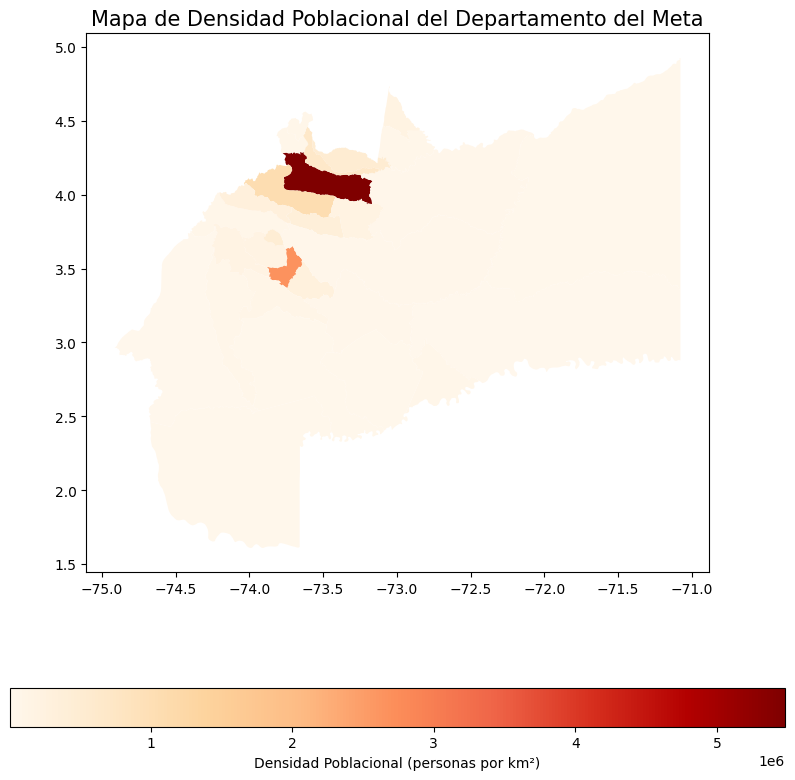

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Asegurarnos de que la columna 'Total' tenga valores numéricos
gdf_meta['Total'] = pd.to_numeric(gdf_meta['Total'], errors='coerce')

# Calcular la densidad poblacional (personas por km²)
# Si ya tienes la información de área por municipio en tu base de datos, puedes usar esa columna.
# Si no, asumimos que ya está en el objeto GeoDataFrame (gdf_meta) en la propiedad 'geometry'.
gdf_meta['density'] = gdf_meta['Total'] / gdf_meta.geometry.area

# Crear el mapa de densidad poblacional
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Mostrar el mapa de densidad, usando un mapa de color
gdf_meta.plot(column='density', ax=ax, legend=True,
              legend_kwds={'label': "Densidad Poblacional (personas por km²)",
                           'orientation': "horizontal"},
              cmap='OrRd')  # Colormap de Rojos (OrRd) para mostrar densidad

# Añadir título
ax.set_title("Mapa de Densidad Poblacional del Departamento del Meta", fontsize=15)

# Mostrar el mapa
plt.show()


<ipython-input-51-24a65efb544d>:9: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_meta['density'] = gdf_meta['Total'] / gdf_meta.geometry.area


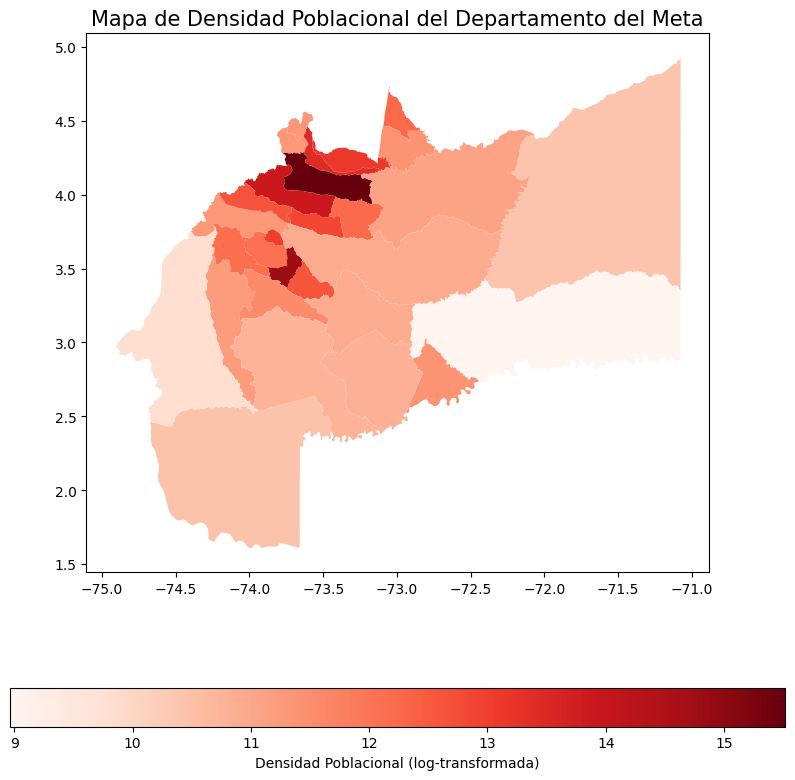

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

# Asegurarnos de que la columna 'Total' tenga valores numéricos
gdf_meta['Total'] = pd.to_numeric(gdf_meta['Total'], errors='coerce')

# Calcular la densidad poblacional (personas por km²)
gdf_meta['density'] = gdf_meta['Total'] / gdf_meta.geometry.area

# Usar una escala logarítmica para suavizar las diferencias en densidad
# Esto ayudará a que las zonas menos densas no se vean tan claras
gdf_meta['log_density'] = np.log1p(gdf_meta['density'])  # Usamos log1p para evitar log(0)

# Crear el mapa de densidad poblacional
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Mostrar el mapa de densidad, usando una escala de rojo
gdf_meta.plot(column='log_density', ax=ax, legend=True,
              legend_kwds={'label': "Densidad Poblacional (log-transformada)",
                           'orientation': "horizontal"},
              cmap='Reds')  # Colormap rojo

# Añadir título
ax.set_title("Mapa de Densidad Poblacional del Departamento del Meta", fontsize=15)

# Mostrar el mapa
plt.show()



In [ ]:
print(df_municipio_victimas)

     CRIMINALIDAD ES_ARCHIVO ES_PRECLUSIÓN    ESTADO     ETAPA_CASO      LEY  \
11             NO         SI            NO  INACTIVO     INDAGACIÓN  Ley 906   
135            NO         SI            NO  INACTIVO     INDAGACIÓN  Ley 906   
621            SI         SI            NO  INACTIVO     INDAGACIÓN  Ley 906   
878            SI         NO            NO    ACTIVO     INDAGACIÓN  Ley 906   
891            SI         NO            NO    ACTIVO     INDAGACIÓN  Ley 906   
1105           SI         NO            NO    ACTIVO     INDAGACIÓN  Ley 906   
1122           SI         NO            NO    ACTIVO     INDAGACIÓN  Ley 906   
1225           SI         NO            NO    ACTIVO     INDAGACIÓN  Ley 906   
1242           SI         NO            NO    ACTIVO     INDAGACIÓN  Ley 906   
1366           SI         NO            NO    ACTIVO     INDAGACIÓN  Ley 906   
1609           SI         NO            NO    ACTIVO     INDAGACIÓN  Ley 906   
1689           SI         NO            

In [ ]:
import pandas as pd

# Agrupar por municipio y sumar las víctimas
df_resumen_victimas = df_victimas_2024.groupby('MUNICIPIO_HECHO')['TOTAL_VÍCTIMAS'].sum().reset_index()

# Verificar el resultado
print(df_resumen_victimas)


         MUNICIPIO_HECHO  TOTAL_VÍCTIMAS
0                ACACÍAS             617
1       BARRANCA DE UPÍA              56
2               CABUYARO              33
3      CASTILLA LA NUEVA              87
4               CUBARRAL              30
5                CUMARAL             192
6            EL CALVARIO               3
7            EL CASTILLO              21
8              EL DORADO              17
9          FUENTE DE ORO              47
10               GRANADA             407
11                GUAMAL              90
12           LA MACARENA             132
13              LEJANÍAS              62
14             MAPIRIPÁN              33
15               MESETAS              49
16      PUERTO CONCORDIA              72
17         PUERTO GAITÁN             207
18         PUERTO LLERAS              36
19          PUERTO LÓPEZ             188
20           PUERTO RICO              62
21              RESTREPO              90
22  SAN CARLOS DE GUAROA              89
23     SAN JUAN 

In [ ]:


 # Unir los datos de población con las geometrías del mapa usando la columna de municipio
gdf_meta = gdf_meta.merge(df_resumen_victimas, left_on='MPIO_CNMBR', right_on='MUNICIPIO_HECHO', how='left')

# Verificar que la fusión fue exitosa
print(gdf_meta.head())

  DPTOMPIO DPTO_CCDGO MPIO_CCDGO         MPIO_CNMBR MPIO_CCNCT  \
0    50001         50        001      VILLAVICENCIO      50001   
1    50006         50        006            ACACÍAS      50006   
2    50110         50        110   BARRANCA DE UPÍA      50110   
3    50124         50        124           CABUYARO      50124   
4    50150         50        150  CASTILLA LA NUEVA      50150   

                                            geometry  DP DPNOM   MPIO  \
0  POLYGON ((-73.62782 4.2867, -73.62824 4.28672,...  50  Meta  50001   
1  POLYGON ((-73.74266 4.19949, -73.74266 4.19949...  50  Meta  50006   
2  POLYGON ((-73.00068 4.65887, -73.0009 4.659, -...  50  Meta  50110   
3  POLYGON ((-72.8421 4.43241, -72.8456 4.4323, -...  50  Meta  50124   
4  POLYGON ((-73.45948 3.85465, -73.4596 3.85449,...  50  Meta  50150   

                DPMP  ...  Total_83 Total_84  Total_85 y más  Total Hombres  \
0      VILLAVICENCIO  ...       917      808            4515         289338   
1     

In [ ]:
# Filtrar solo las filas donde SEXO es "FEMENINO"
df_femenino = df_victimas_2024[df_victimas_2024['SEXO'] == 'FEMENINO']

# Agrupar por municipio y sumar las víctimas
df_resumen_victimas_femenino = df_femenino.groupby('MUNICIPIO_HECHO')['TOTAL_VÍCTIMAS'].sum().reset_index()

# Verificar el resultado
print(df_resumen_victimas_femenino)


         MUNICIPIO_HECHO  TOTAL_VÍCTIMAS
0                ACACÍAS             404
1       BARRANCA DE UPÍA              40
2               CABUYARO              22
3      CASTILLA LA NUEVA              54
4               CUBARRAL              17
5                CUMARAL             123
6            EL CALVARIO               2
7            EL CASTILLO              12
8              EL DORADO              13
9          FUENTE DE ORO              30
10               GRANADA             267
11                GUAMAL              54
12           LA MACARENA              62
13              LEJANÍAS              38
14             MAPIRIPÁN              17
15               MESETAS              33
16      PUERTO CONCORDIA              58
17         PUERTO GAITÁN             117
18         PUERTO LLERAS              19
19          PUERTO LÓPEZ             110
20           PUERTO RICO              46
21              RESTREPO              55
22  SAN CARLOS DE GUAROA              53
23     SAN JUAN 

In [ ]:

 # Unir los datos de población con las geometrías del mapa usando la columna de municipio
gdf_meta = gdf_meta.merge(df_resumen_victimas_femenino, left_on='MPIO_CNMBR', right_on='MUNICIPIO_HECHO', how='left')

# Verificar que la fusión fue exitosa
print(gdf_meta.head())

  DPTOMPIO DPTO_CCDGO MPIO_CCDGO         MPIO_CNMBR MPIO_CCNCT  \
0    50001         50        001      VILLAVICENCIO      50001   
1    50006         50        006            ACACÍAS      50006   
2    50110         50        110   BARRANCA DE UPÍA      50110   
3    50124         50        124           CABUYARO      50124   
4    50150         50        150  CASTILLA LA NUEVA      50150   

                                            geometry  DP DPNOM   MPIO  \
0  POLYGON ((-73.62782 4.2867, -73.62824 4.28672,...  50  Meta  50001   
1  POLYGON ((-73.74266 4.19949, -73.74266 4.19949...  50  Meta  50006   
2  POLYGON ((-73.00068 4.65887, -73.0009 4.659, -...  50  Meta  50110   
3  POLYGON ((-72.8421 4.43241, -72.8456 4.4323, -...  50  Meta  50124   
4  POLYGON ((-73.45948 3.85465, -73.4596 3.85449,...  50  Meta  50150   

                DPMP  ...  Total_85 y más Total Hombres  Total Mujeres  \
0      VILLAVICENCIO  ...            4515        289338         296520   
1            ACA

In [ ]:
# Crear la nueva variable "tasa_mujeres_victimas"
gdf_meta['tasa_mujeres_victimas'] = (gdf_meta['TOTAL_VÍCTIMAS_y'] / gdf_meta['Total Mujeres']) * 1000


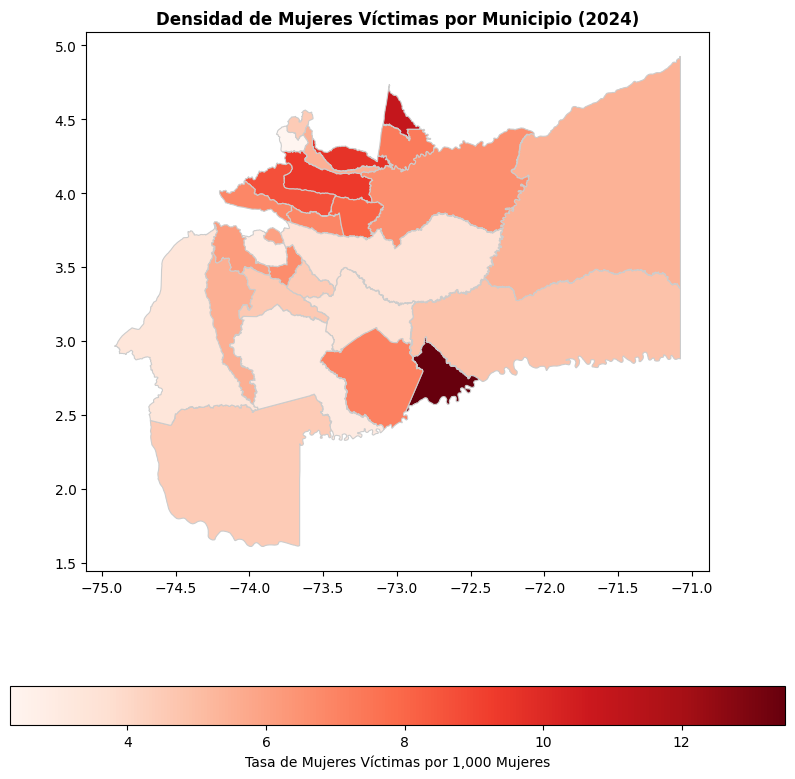

In [ ]:
import matplotlib.pyplot as plt
import geopandas as gpd

# Crear el mapa con la tasa de víctimas femeninas
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Hacer el mapa de densidad usando la variable "tasa_mujeres_victimas"
gdf_meta.plot(column='tasa_mujeres_victimas', ax=ax, legend=True,
              legend_kwds={'label': "Tasa de Mujeres Víctimas por 1,000 Mujeres",
                           'orientation': "horizontal"},
              cmap='Reds',  # Mapa de colores en tonos rojos
              linewidth=0.8, edgecolor='0.8', figsize=(10, 10))

# Título del mapa
ax.set_title('Densidad de Mujeres Víctimas por Municipio (2024)', fontweight='bold')

# Mostrar el mapa
plt.show()


In [ ]:
 # Unir los datos de población con las geometrías del mapa usando la columna de municipio
gdf_meta = gdf_meta.merge(df_politica, left_on='MPIO_CNMBR', right_on='MUNICIPIO', how='left')

# Verificar que la fusión fue exitosa
print(gdf_meta.head())

  DPTOMPIO DPTO_CCDGO MPIO_CCDGO         MPIO_CNMBR MPIO_CCNCT  \
0    50001         50        001      VILLAVICENCIO      50001   
1    50006         50        006            ACACÍAS      50006   
2    50110         50        110   BARRANCA DE UPÍA      50110   
3    50124         50        124           CABUYARO      50124   
4    50150         50        150  CASTILLA LA NUEVA      50150   

                                            geometry  DP DPNOM   MPIO  \
0  POLYGON ((-73.62782 4.2867, -73.62824 4.28672,...  50  Meta  50001   
1  POLYGON ((-73.74266 4.19949, -73.74266 4.19949...  50  Meta  50006   
2  POLYGON ((-73.00068 4.65887, -73.0009 4.659, -...  50  Meta  50110   
3  POLYGON ((-72.8421 4.43241, -72.8456 4.4323, -...  50  Meta  50124   
4  POLYGON ((-73.45948 3.85465, -73.4596 3.85449,...  50  Meta  50150   

                DPMP  ...  tasa_mujeres_victimas          MUNICIPIO  \
0      VILLAVICENCIO  ...               9.341697      VILLAVICENCIO   
1            ACACÍAS  

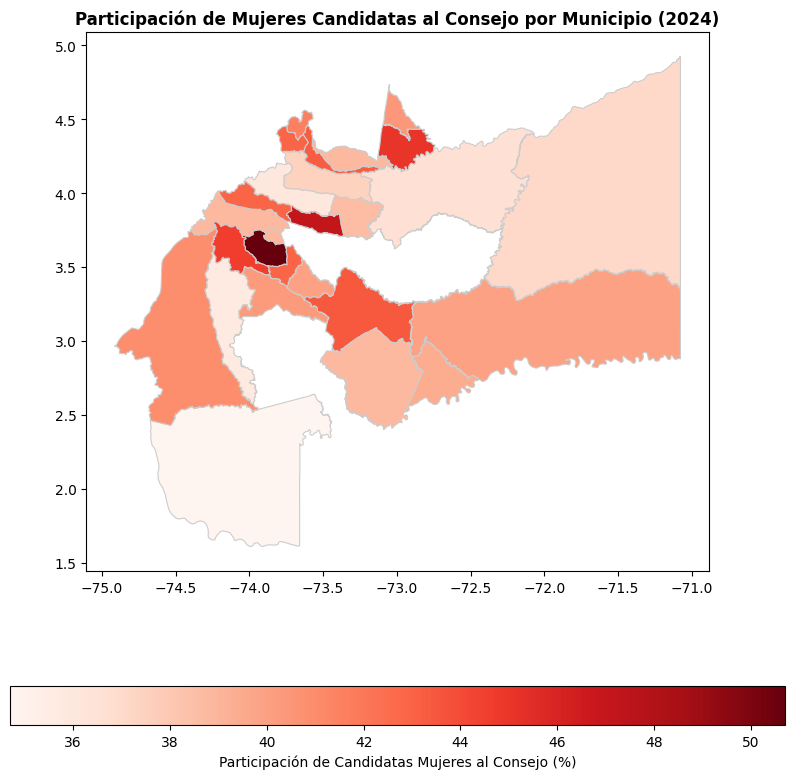

In [ ]:
# Crear el mapa de participación de candidatas mujeres en el consejo
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Crear el mapa de participación en el consejo
gdf_meta.plot(column='participación candidatas mujeres consejo', ax=ax, legend=True,
              legend_kwds={'label': "Participación de Candidatas Mujeres al Consejo (%)",
                           'orientation': "horizontal"},
              cmap='Reds',  # Usar paleta roja para representar participación
              linewidth=0.8, edgecolor='0.8')

# Título del mapa
ax.set_title('Participación de Mujeres Candidatas al Consejo por Municipio (2024)', fontweight='bold')

# Mostrar el mapa
plt.show()


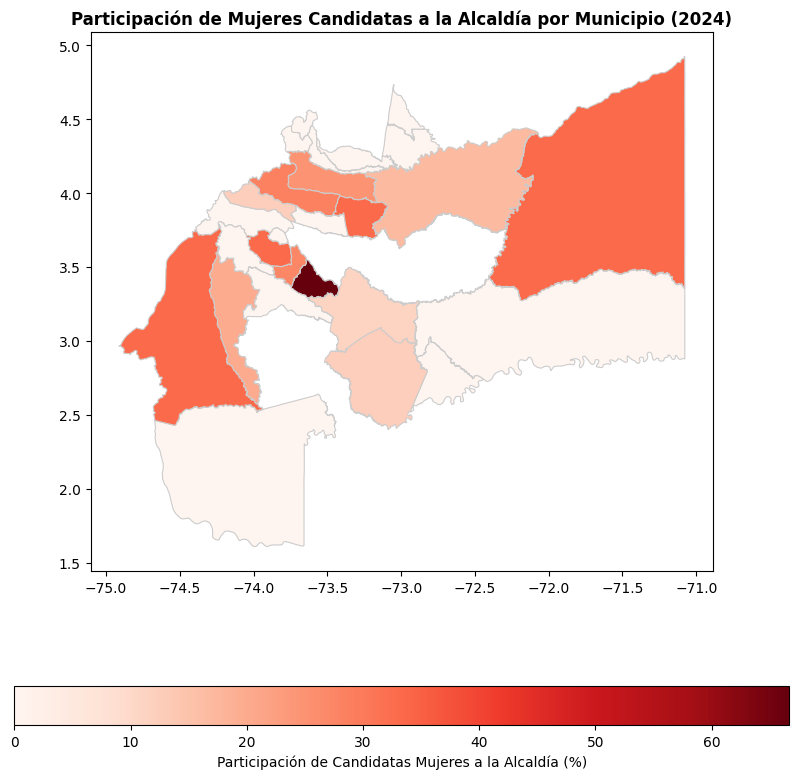

In [ ]:
# Crear el mapa de participación de candidatas mujeres en la alcaldía
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Crear el mapa de participación en la alcaldía
gdf_meta.plot(column='participación candidatas mujeres alcaldía', ax=ax, legend=True,
              legend_kwds={'label': "Participación de Candidatas Mujeres a la Alcaldía (%)",
                           'orientation': "horizontal"},
              cmap='Reds',  # Usar paleta roja para representar participación
              linewidth=0.8, edgecolor='0.8')

# Título del mapa
ax.set_title('Participación de Mujeres Candidatas a la Alcaldía por Municipio (2024)', fontweight='bold')

# Mostrar el mapa
plt.show()
